In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = mysql.connector.connect (
     host = 'localhost',
     user = 'root',
     password = 'XXXXXXXXXXX',
     database = 'amazon_database'
)

mycursor = db.cursor()
print(db)

In [3]:
mycursor.execute('Select * from amazon limit 5')
result = mycursor.fetchall()
for row in result:
    print(row)

('750-67-8428', 'A', 'Yangon', 'Member', 'Female', 'Health and beauty', Decimal('74.69'), 7, 26.1415, Decimal('548.97'), datetime.date(2019, 1, 5), datetime.timedelta(seconds=47280), 'Ewallet', Decimal('522.83'), 4.7619, Decimal('26.14'), 9.1, 'Afternoon', 'Sat', 'Jan')
('226-31-3081', 'C', 'Naypyitaw', 'Normal', 'Female', 'Electronic accessories', Decimal('15.28'), 5, 3.82, Decimal('80.22'), datetime.date(2019, 3, 8), datetime.timedelta(seconds=37740), 'Cash', Decimal('76.40'), 4.7619, Decimal('3.82'), 9.6, 'Morning', 'Fri', 'Mar')
('631-41-3108', 'A', 'Yangon', 'Normal', 'Male', 'Home and lifestyle', Decimal('46.33'), 7, 16.2155, Decimal('340.53'), datetime.date(2019, 3, 3), datetime.timedelta(seconds=48180), 'Credit card', Decimal('324.31'), 4.7619, Decimal('16.22'), 7.4, 'Afternoon', 'Sun', 'Mar')
('123-19-1176', 'A', 'Yangon', 'Member', 'Male', 'Health and beauty', Decimal('58.22'), 8, 23.288, Decimal('489.05'), datetime.date(2019, 1, 27), datetime.timedelta(seconds=73980), 'Ewall

In [4]:
data = 'select * from amazon'
amazon = pd.read_sql(data, db)

C:\Users\Bhawar\AppData\Local\Temp\ipykernel_6836\379300747.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  amazon = pd.read_sql(data, db)


In [5]:
amazon.head()

,Invoice_Id,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,VAT,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,time_of_day,day_name,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,2019-01-05,0 days 13:08:00,Ewallet,522.83,4.7619,26.14,9.1,Afternoon,Sat,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,2019-03-08,0 days 10:29:00,Cash,76.40,4.7619,3.82,9.6,Morning,Fri,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.53,2019-03-03,0 days 13:23:00,Credit card,324.31,4.7619,16.22,7.4,Afternoon,Sun,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.05,2019-01-27,0 days 20:33:00,Ewallet,465.76,4.7619,23.29,8.4,Evening,Sun,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.38,2019-02-08,0 days 10:37:00,Ewallet,604.17,4.7619,30.21,5.3,Morning,Fri,Feb


In [6]:
amazon.columns

Index(['Invoice_Id', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'VAT', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating', 'time_of_day', 'day_name', 'month_name'],
      dtype='object')

## Exploratory Data Analysis

1. What is the count of distinct cities in the dataset?

In [7]:
amazon['City'].nunique()

3

2. For each branch, what is the corresponding city?

In [8]:
amazon.groupby('Branch')['City'].value_counts()

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
Name: City, dtype: int64

3. What is the count of distinct product lines in the dataset?

In [9]:
amazon['Product_line'].nunique()

6

4. Which payment method occurs most frequently?

In [10]:
amazon['Payment'].max()

'Ewallet'

5. Which product line has the highest sales?

In [16]:
high_sales = amazon.groupby('Product_line')['gross_income'].sum().sort_values(ascending=False)
high_sales

Product_line
Food and beverages        2673.68
Sports and travel         2625.07
Electronic accessories    2587.61
Fashion accessories       2586.13
Home and lifestyle        2564.90
Health and beauty         2342.66
Name: gross_income, dtype: float64

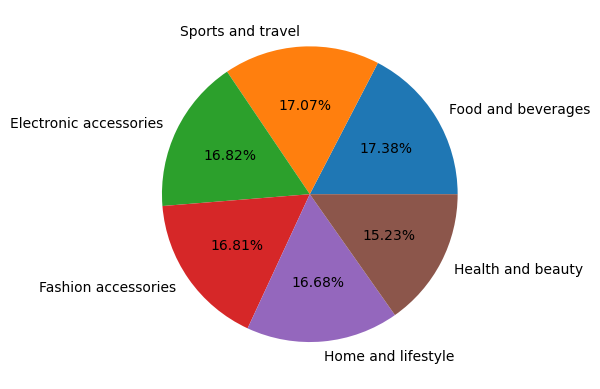

In [22]:
labels = high_sales.index.tolist()
plt.pie(high_sales,labels= labels, autopct='%1.2f%%',)
plt.show()

6. How much revenue is generated each month?

In [23]:
rev_month = amazon.groupby('month_name')['Total'].sum().sort_values(ascending=False)
rev_month

month_name
Jan    116292.11
Mar    109455.74
Feb     97219.58
Name: Total, dtype: float64

7. In which month did the cost of goods sold reach its peak?

In [13]:
amazon.groupby('month_name')['cogs'].max().idxmax()

'Feb'

8. Which product line generated the highest revenue?

In [14]:
amazon.groupby('Product_line')['Total'].sum().idxmax()

'Food and beverages'

9. In which city was the highest revenue recorded?

In [15]:
amazon.groupby('City')['Total'].sum().sort_values(ascending=False)

City
Naypyitaw    110568.86
Yangon       106200.57
Mandalay     106198.00
Name: Total, dtype: float64

10. Which product line incurred the highest Value Added Tax?

In [29]:
amazon.groupby('Product_line')['VAT'].sum().sort_values(ascending=False)

Product_line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: VAT, dtype: float64

11. For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."

In [11]:
avg_sales = amazon['gross_income'].mean()
amazon['sales_performance'] = np.where(amazon['gross_income'] > avg_sales, 'Good', 'Bad')
amazon.head()

,Invoice_Id,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,VAT,Total,...,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,time_of_day,day_name,month_name,sales_performance
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.97,...,0 days 13:08:00,Ewallet,522.83,4.7619,26.14,9.1,Afternoon,Sat,Jan,Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,...,0 days 10:29:00,Cash,76.40,4.7619,3.82,9.6,Morning,Fri,Mar,Bad
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.53,...,0 days 13:23:00,Credit card,324.31,4.7619,16.22,7.4,Afternoon,Sun,Mar,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.05,...,0 days 20:33:00,Ewallet,465.76,4.7619,23.29,8.4,Evening,Sun,Jan,Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.38,...,0 days 10:37:00,Ewallet,604.17,4.7619,30.21,5.3,Morning,Fri,Feb,Good


In [12]:
amazon['sales_performance'].value_counts()

Bad     597
Good    403
Name: sales_performance, dtype: int64

12. Identify the branch that exceeded the average number of products sold.

In [18]:
mycursor.execute('select distinct branch from amazon where quantity > (select avg(quantity) from amazon ) ')
result = mycursor.fetchall()
for row in result:
    print(row)

('A',)
('C',)
('B',)


In [19]:
avg_product_sold = amazon['Quantity'].mean()
branch_exceed_avg = amazon[amazon['Quantity'] > avg_product_sold]
branch_names = branch_exceed_avg['Branch'].unique()
branch_names

array(['A', 'C', 'B'], dtype=object)

13. Which product line is most frequently associated with each gender?

In [20]:
result = amazon.groupby('Gender')['Product_line'].value_counts()
most_freq = result.groupby('Gender').idxmax()
most_freq

Gender
Female    (Female, Fashion accessories)
Male          (Male, Health and beauty)
Name: Product_line, dtype: object

14. Calculate the average rating for each product line.

In [24]:
amazon.groupby('Product_line')['Rating'].mean()

Product_line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64

15. Count the sales occurrences for each time of day on every weekday.

In [25]:
count = amazon.groupby(['time_of_day','day_name']).size()
count

time_of_day  day_name
Afternoon    Fri         74
             Mon         75
             Sat         81
             Sun         70
             Thu         76
             Tue         71
             Wed         81
Evening      Fri         36
             Mon         29
             Sat         55
             Sun         41
             Thu         29
             Tue         51
             Wed         40
Morning      Fri         29
             Mon         21
             Sat         28
             Sun         22
             Thu         33
             Tue         36
             Wed         22
dtype: int64

16. Identify the customer type contributing the highest revenue.

In [26]:
amazon.groupby('Customer_type')['Total'].sum()

Customer_type
Member    164223.81
Normal    158743.62
Name: Total, dtype: float64

17. Determine the city with the highest VAT percentage.

In [28]:
vat_city = amazon.groupby('City')['VAT'].sum()
rev_city = amazon.groupby('City')['Total'].sum()
vat_percent = (vat_city/rev_city)*100
vat_percent

City
Mandalay     4.761890
Naypyitaw    4.761898
Yangon       4.761896
dtype: float64

18. Identify the customer type with the highest VAT payments.

In [30]:
amazon.groupby('Customer_type')['VAT'].sum()

Customer_type
Member    7820.164
Normal    7559.205
Name: VAT, dtype: float64

19. What is the count of distinct customer types in the dataset?

In [31]:
amazon['Customer_type'].nunique()

2

20. What is the count of distinct payment methods in the dataset?

In [32]:
amazon['Payment'].nunique()

3

21. Which customer type occurs most frequently?

In [33]:
customer_type_counts = amazon['Customer_type'].value_counts()
most_frequent_customer_type = customer_type_counts.idxmax()
most_frequent_customer_type

'Member'

22. Identify the customer type with the highest purchase frequency.

In [34]:
amazon.groupby('Customer_type')['Quantity'].sum()

Customer_type
Member    2785
Normal    2725
Name: Quantity, dtype: int64

23. Determine the predominant gender among customers.

In [35]:
amazon['Gender'].value_counts().idxmax()

'Female'

24. Examine the distribution of genders within each branch.

In [36]:
gender_branch_distribution = pd.crosstab(amazon['Gender'], amazon['Branch'])
gender_branch_distribution

Branch,A,B,C
Gender,,,
Female,161,162,178
Male,179,170,150


25. Identify the time of day when customers provide the most ratings.

In [37]:
amazon.groupby('time_of_day')['Rating'].size().idxmax()

'Afternoon'

26. Determine the time of day with the highest customer ratings for each branch.

In [38]:
amazon.groupby(['Branch','time_of_day'])['Rating'].size()

Branch  time_of_day
A       Afternoon      185
        Evening         82
        Morning         73
B       Afternoon      162
        Evening        111
        Morning         59
C       Afternoon      181
        Evening         88
        Morning         59
Name: Rating, dtype: int64

27. Identify the day of the week with the highest average ratings.

In [39]:
amazon.groupby('day_name')['Rating'].mean().idxmax()

'Mon'

28. Determine the day of the week with the highest average ratings for each branch.

In [40]:
average_ratings_by_day = amazon.groupby(['Branch','day_name'])['Rating'].mean()
highest_average_ratings = average_ratings_by_day.groupby('Branch').idxmax()
highest_average_ratings

Branch
A    (A, Fri)
B    (B, Mon)
C    (C, Fri)
Name: Rating, dtype: object